In [96]:
import numpy as np
import matplotlib.pyplot as plt

Let's first start with implementing and plotting the sigmoid function.

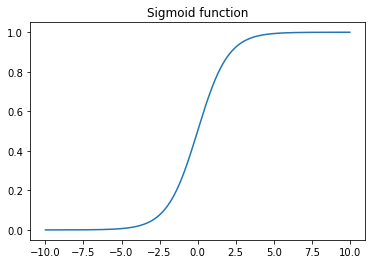

In [97]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))
x = np.linspace(-10.0, 10.0, num=5000)
y = np.array([sigmoid(xi) for xi in x])
plt.title("Sigmoid function")
plt.plot(x,y)
plt.show()

In [98]:
# what the difference between loss and cost?
# Loss is calculated for one estimated-real value pair
# Cost is average of all losses
def loss(y_est,y):
    return -y * np.log(y_est) - (1-y) * np.log(1-y_est)
def cost(y_est_arr,y_arr):
    ans = 0
    for yi_est,yi in zip(y_est_arr,y_arr):
        ans += loss(yi_est,yi)
    ans /= len(y_arr)
    return ans

In [99]:
def predict_binary(x,w,b):
    num = sigmoid(w*x+b)
    if num >= 0.5:
        return 1
    return 0
def predict_float(x,w,b):
    return sigmoid(w*x+b)

In [100]:
def prt_derivative_loss_wrt_w(x,y,y_est):
    return (y_est-y)*x
def prt_derivative_cost_wrt_w(x,y,y_est):
    sum = 0
    for xi,yi,yi_est in zip(x,y,y_est):
        sum += prt_derivative_loss_wrt_w(xi,yi,yi_est)
    return sum / len(x)
def prt_derivative_loss_wrt_b(y,y_est):
    return (y_est-y)
def prt_derivative_cost_wrt_b(x,y,y_est):
    sum = 0
    for xi,yi,yi_est in zip(x,y,y_est):
        sum += prt_derivative_loss_wrt_b(yi,yi_est)
    return sum / len(x)

In [101]:
x = np.linspace(0.5,5.5,num = 20)
y = np.array([0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1])
w = -1
b = -1
alpha = 0.01

In [102]:
def gradient_descent(x,y,w,b,alpha):
    prev_c = 10**10
    curr_c = cost([predict_float(xi,w,b) for xi in x],y)
    print("cost before starting: ",curr_c)
    while prev_c != curr_c:
        y_est = [predict_float(xi,w,b) for xi in x]
        prev_c = cost(y_est,y)
        tmp_w = w - alpha*prt_derivative_cost_wrt_w(x,y,y_est)
        tmp_b = b - alpha*prt_derivative_cost_wrt_b(x,y,y_est)
        w = tmp_w
        b = tmp_b
        curr_c = cost([predict_float(xi,w,b) for xi in x],y)
    print("cost after end: ", curr_c)
    return [w,b]
[w,b] = gradient_descent(x,y,w,b,alpha)
print("w is ", w)
print("b is ",b)

cost before starting:  2.571539972951085
cost after end:  0.3998263645808232
w is  1.440790113752758
b is  -4.322369218698106


In [106]:
y_est = [predict_binary(xi,w,b) for xi in x]
predicted_true = []
predicted_false = []
true_values_of_false_predictions = []
for xi,yi_est, yi in zip(x,y_est,y):
    if yi_est == yi:
        predicted_true.append(xi)
    else:
        predicted_false.append(xi)
        true_values_of_false_predictions.append(yi)
        

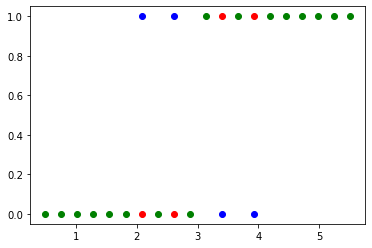

In [107]:
plt.scatter(predicted_false,[predict_binary(xi,w,b) for xi in predicted_false],color='r')
plt.scatter(predicted_false,true_values_of_false_predictions,color='b')
plt.scatter(predicted_true,[predict_binary(xi,w,b) for xi in predicted_true],color = 'g')
plt.show()

Greens are correct predictions, reds are false predictions. Blues are real values for false predictions.